<a href="https://colab.research.google.com/github/paulorsf29/AnaliseDeDados_SituacaoDeTrabalhoCSV/blob/main/ProjetoPix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime

In [ ]:
pix_df = pd.read_csv('/content/comprovantes_pix_10000_anomalias.csv', delimiter=';')

In [ ]:
pix_df.head()

,EndToEndId,DataHora,Valor,Moeda,Pagador_Nome,Pagador_CPF_CNPJ,Pagador_Banco,Recebedor_Nome,Recebedor_CPF_CNPJ,Recebedor_Banco,ChavePix_Utilizada,TipoChave,Descricao,Status,Anomalia
0,f094cb2c-2a73-463c-b60e-0c57262051e4,2025-06-26 21:07:56,4658.86,BRL,Nathan Cardoso,13.253.967/0001-95,BTG Pactual,Ana Beatriz Ramos,901.361.580-95,Nubank,+559694830-9884,Telefone,Pagamento referente ao serviço 927,Concluída,0
1,f0409769-741f-49bd-811a-3842cc8f54db,2025-06-23 17:47:56,3184.72,BRL,Benjamin Barros,781.515.544-64,Banco do Brasil,Carlos Eduardo Nunes,288.758.607-72,Itaú Unibanco,+552298530-1917,Telefone,Pagamento referente ao serviço 950,Pendente,0
2,c1d22287-d343-4c91-b03d-dbe9a69695b3,2025-06-27 15:58:56,1054.48,BRL,Lorena Cunha,444.922.709-96,Banco Inter,Lívia Silveira,530.827.935-48,Bradesco,c4f4c3c6-4d78-4946-b33e-4a1135711a8a,Chave Aleatória,Pagamento referente ao serviço 173,Pendente,0
3,254423a9-50b7-41b1-a099-e8cf6232bab4,2025-07-15 13:59:56,3564.76,BRL,Sra. Luana Pinto,468.153.904-62,Banco Safra,Helena Pires,827.707.674-51,Caixa Econômica Federal,user421@email.com,E-mail,Pagamento referente ao serviço 560,Estornada,0
4,f1c5e3e7-bc62-4f18-91e3-c8f92aebdd59,2025-06-23 06:19:56,15.16,BRL,João Miguel da Cunha,83.407.726/0001-68,Santander Brasil,Dr. Luiz Felipe Dias,65.245.322/0001-12,C6 Bank,user97@email.com,E-mail,Pagamento referente ao serviço 140,Pendente,0


In [ ]:
pix_df['Pagador_Banco'].unique()

array(['BTG Pactual', 'Banco do Brasil', 'Banco Inter', 'Banco Safra',
       'Santander Brasil', 'Banco Pan', 'Bradesco',
       'Caixa Econômica Federal', 'C6 Bank', 'Nubank', 'Itaú Unibanco',
       'Banco Original'], dtype=object)

In [ ]:
print("-- informações gerais --")
print(f"Shape: {pix_df.shape}")
print(f"Colunas: {pix_df.columns.tolist()}")

# Verificar dados Nan faltantes
print(f"\nDados faltantes: {pix_df.isnull().sum().sum()}")

# 1. converção de tipo de dado
pix_df['DataHora'] = pd.to_datetime(pix_df['DataHora'], errors='coerce')
pix_df['Valor'] = pd.to_numeric(pix_df['Valor'], errors='coerce')

# 2. derivando variaveis de data e hora
pix_df['Ano'] = pix_df['DataHora'].dt.year
pix_df['Mes'] = pix_df['DataHora'].dt.month
pix_df['Dia'] = pix_df['DataHora'].dt.day
pix_df['Hora'] = pix_df['DataHora'].dt.hour
pix_df['DiaSemana'] = pix_df['DataHora'].dt.dayofweek
pix_df['DiaSemanaNome'] = pix_df['DataHora'].dt.day_name()

-- informações gerais --
Shape: (10000, 15)
Colunas: ['EndToEndId', 'DataHora', 'Valor', 'Moeda', 'Pagador_Nome', 'Pagador_CPF_CNPJ', 'Pagador_Banco', 'Recebedor_Nome', 'Recebedor_CPF_CNPJ', 'Recebedor_Banco', 'ChavePix_Utilizada', 'TipoChave', 'Descricao', 'Status', 'Anomalia']

Dados faltantes: 0


analise e busca de padrões nas anomalias

In [ ]:
# Criar faixa de valor
pix_df['FaixaValor'] = pd.cut(pix_df['Valor'],
                         bins=[0, 100, 500, 1000, 5000, float('inf')],
                         labels=['0-100', '100-500', '500-1000', '1000-5000', '5000+'])

# 3 analise das anomalias
print("\n--analize das anomalias--")
anomalia_counts = pix_df['Anomalia'].value_counts()
print("Distribuição de Anomalias:")
print(anomalia_counts)
print(f"Percentual de anomalias: {anomalia_counts[1]/len(pix_df)*100:.2f}%")

# Separar transações normais e anômalas
normais = pix_df[pix_df['Anomalia'] == 0]
anomalas = pix_df[pix_df['Anomalia'] == 1]

print(f"\nTransações normais: {len(normais)}")
print(f"Transações anômalas: {len(anomalas)}")

#Comparar estatísticas descritivas
print("\nValor - Transações Normais:")
print(normais['Valor'].describe())
print("\nValor - Transações Anômalas:")
print(anomalas['Valor'].describe())

# 4 tentando detectar possiveis padrões nas anomalias
print("\n PADRÕES NAS ANOMALIAS ")

print("\nStatus - Transações Anômalas:")
print(anomalas['Status'].value_counts())

print("\nTipoChave - Transações Anômalas:")
print(anomalas['TipoChave'].value_counts())

print("\nTop 5 Bancos Pagadores em Anomalias:")
print(anomalas['Pagador_Banco'].value_counts().head(5))

print("\nDistribuição por Hora - Anomalias:")
print(anomalas['Hora'].value_counts().sort_index().head())




--analize das anomalias--
Distribuição de Anomalias:
Anomalia
0    9900
1     100
Name: count, dtype: int64
Percentual de anomalias: 1.00%

Transações normais: 9900
Transações anômalas: 100

Valor - Transações Normais:
count    9900.000000
mean     2510.428647
std      1452.703462
min         5.620000
25%      1250.057500
50%      2524.315000
75%      3768.080000
max      4999.790000
Name: Valor, dtype: float64

Valor - Transações Anômalas:
count     100.000000
mean     1985.014200
std      1701.722779
min         0.000000
25%       215.977500
50%      1886.135000
75%      3521.837500
max      4915.280000
Name: Valor, dtype: float64

 PADRÕES NAS ANOMALIAS 

Status - Transações Anômalas:
Status
Concluída    34
Pendente     33
Estornada    33
Name: count, dtype: int64

TipoChave - Transações Anômalas:
TipoChave
Chave Aleatória    27
E-mail             20
CNPJ               19
CPF                18
Telefone           16
Name: count, dtype: int64

Top 5 Bancos Pagadores em Anomalias:
Pag

montagem dos graficos analizando e comparando as transações normais com as transações anomalas

/tmp/ipython-input-2995836601.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(['Normal', 'Anômala'])


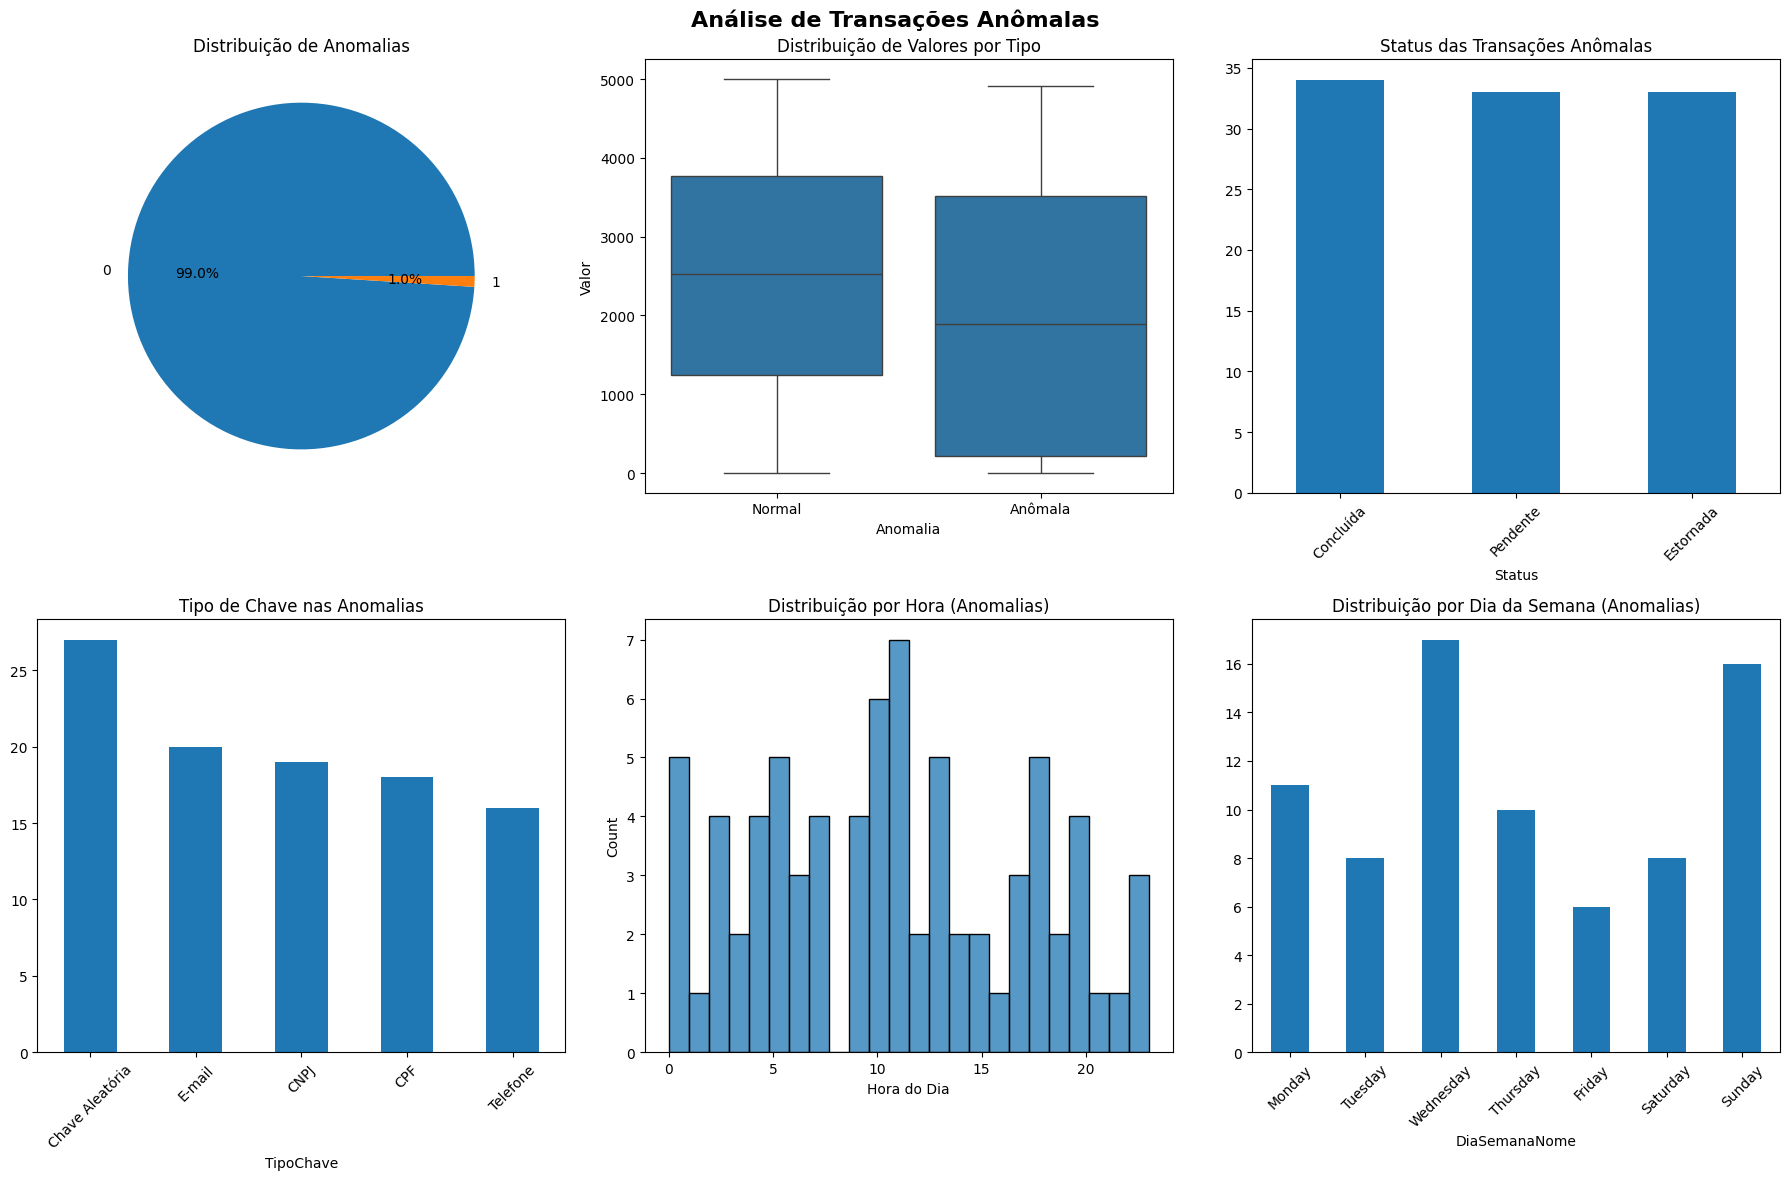

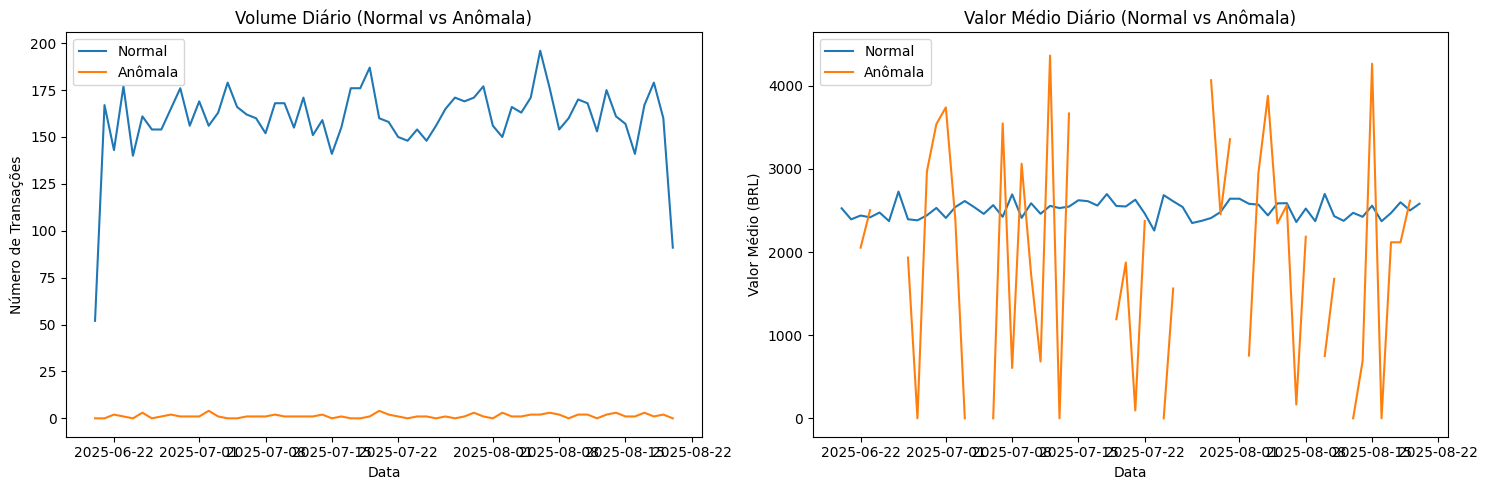


--resumo--
Total de transações anomalas: 100
Percentual sobre o total: 1.0000%
Valor total das anomalias: R$ 198501.42
Valor médio das anomalias: R$ 1985.01

Período coberto: 2025-06-20 15:55:56 a 2025-08-20 15:44:56
Valor total movimentado: R$ 25051745.03


In [ ]:
#graficos
#Gráfico1 Dashboard de Análise das transações
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análise de Transações Anômalas', fontsize=16, fontweight='bold')

#1 Distribuição de anomalias
anomalia_counts.plot(kind='pie', autopct='%1.1f%%', ax=axes[0,0])
axes[0,0].set_title('Distribuição de Anomalias')
axes[0,0].set_ylabel('')

#2 Comparação de valores
sns.boxplot(data=pix_df, x='Anomalia', y='Valor', ax=axes[0,1])
axes[0,1].set_title('Distribuição de Valores por Tipo')
axes[0,1].set_xticklabels(['Normal', 'Anômala'])

#3 Status das transações anômalas
anomalas['Status'].value_counts().plot(kind='bar', ax=axes[0,2])
axes[0,2].set_title('Status das Transações Anômalas')
axes[0,2].tick_params(axis='x', rotation=45)

#4 Tipo de chave nas anomalias
anomalas['TipoChave'].value_counts().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Tipo de Chave nas Anomalias')
axes[1,0].tick_params(axis='x', rotation=45)

#5 Distribuição por hora do dia
sns.histplot(data=anomalas, x='Hora', bins=24, ax=axes[1,1])
axes[1,1].set_title('Distribuição por Hora (Anomalias)')
axes[1,1].set_xlabel('Hora do Dia')

#6 Distribuição por dia da semana
anomalas['DiaSemanaNome'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', ax=axes[1,2])
axes[1,2].set_title('Distribuição por Dia da Semana (Anomalias)')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Gráfico2 Análise temporal
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

pix_df['Data'] = pix_df['DataHora'].dt.date
daily_counts = pix_df.groupby(['Data', 'Anomalia']).size().unstack(fill_value=0)
daily_counts.plot(kind='line', ax=axes[0])
axes[0].set_title('Volume Diário (Normal vs Anômala)')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Número de Transações')
axes[0].legend(['Normal', 'Anômala'])

daily_avg_value = pix_df.groupby(['Data', 'Anomalia'])['Valor'].mean().unstack()
daily_avg_value.plot(kind='line', ax=axes[1])
axes[1].set_title('Valor Médio Diário (Normal vs Anômala)')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Valor Médio (BRL)')
axes[1].legend(['Normal', 'Anômala'])

plt.tight_layout()
plt.show()

# 6. resumo definitivo
print("\n--resumo--")
print(f"Total de transações anomalas: {len(anomalas)}")
print(f"Percentual sobre o total: {len(anomalas)/len(pix_df)*100:.4f}%")
print(f"Valor total das anomalias: R$ {anomalas['Valor'].sum():.2f}")
print(f"Valor médio das anomalias: R$ {anomalas['Valor'].mean():.2f}")

print(f"\nPeríodo coberto: {pix_df['DataHora'].min()} a {pix_df['DataHora'].max()}")
print(f"Valor total movimentado: R$ {pix_df['Valor'].sum():.2f}")

In [ ]:
pix_df['Pagador_Nome']

,Pagador_Nome
0,Nathan Cardoso
1,Benjamin Barros
2,Lorena Cunha
3,Sra. Luana Pinto
4,João Miguel da Cunha
...,...
9995,Giovanna da Luz
9996,Srta. Clarice Araújo
9997,Luiz Felipe Moreira
9998,Bianca Monteiro


**porcentagem de transações estornadas, concluidas e pendentes**

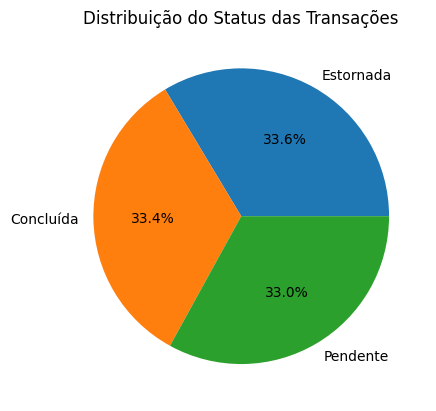

In [ ]:
status_counts = pix_df['Status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%')
plt.title('Distribuição do Status das Transações')
plt.show()

distribuição de valor por transações

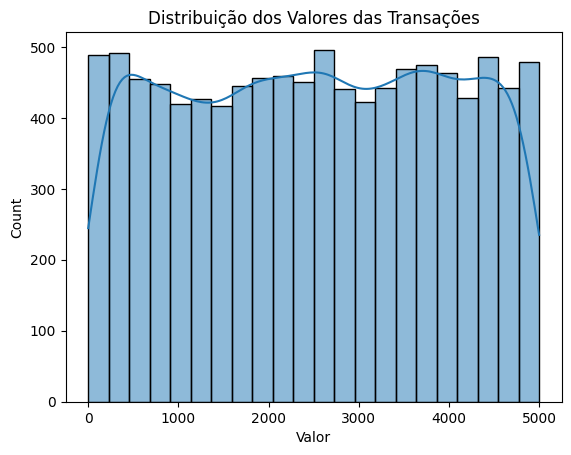

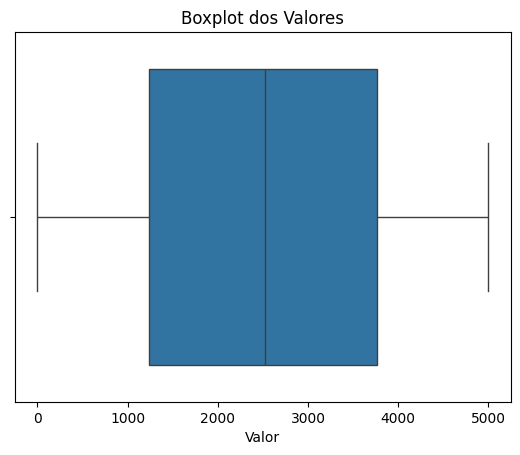

In [ ]:
sns.histplot(pix_df['Valor'], kde=True)
plt.title('Distribuição dos Valores das Transações')
plt.show()

sns.boxplot(x=pix_df['Valor'])
plt.title('Boxplot dos Valores')
plt.show()

frequencia das chaves pix utilizadas

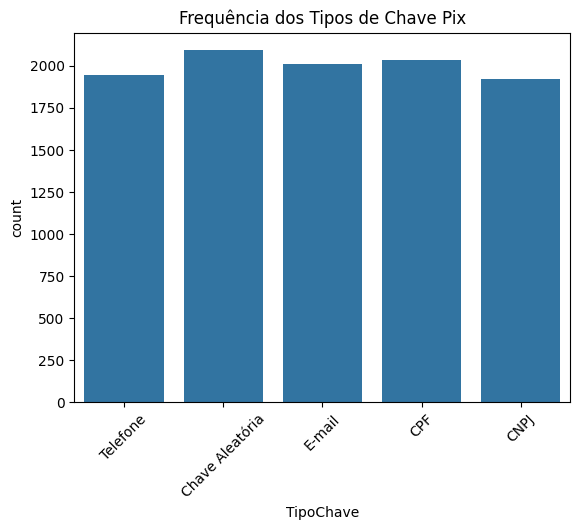

In [ ]:
sns.countplot(data=pix_df, x='TipoChave')
plt.title('Frequência dos Tipos de Chave Pix')
plt.xticks(rotation=45)
plt.show()

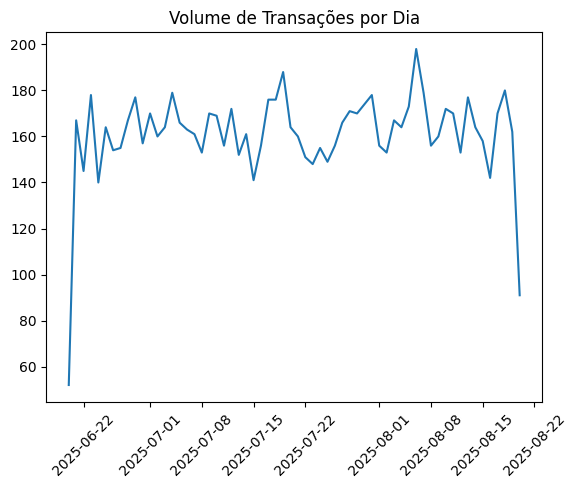

In [ ]:
pix_df['DataHora'] = pd.to_datetime(pix_df['DataHora'])
pix_df['Dia'] = pix_df['DataHora'].dt.date
transacoes_por_dia = pix_df.groupby('Dia').size()

plt.plot(transacoes_por_dia.index, transacoes_por_dia.values)
plt.title('Volume de Transações por Dia')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#usuarios com anomalia e sua frequencia
usuarios_anomalias = pix_df[pix_df['Anomalia'] == 1]['Pagador_CPF_CNPJ'].value_counts().reset_index()
usuarios_anomalias.columns = ['CPF_CNPJ', 'Frequencia_Anomalias']

# relacionado a anomalia com o nome cpf e banco do usuario
nome_usuario = pix_df[['Pagador_CPF_CNPJ', 'Pagador_Nome', 'Pagador_Banco']].drop_duplicates()
usuarioAnomalia_comp = usuarios_anomalias.merge(nome_usuario, left_on='CPF_CNPJ', right_on='Pagador_CPF_CNPJ', how='left')

print("usuarios com anomalias e sua frequencia")
print(f"Total de usuários unicos com anomalias: {len(usuarioAnomalia_comp)}")
print(f"Total de transações anomalas: {usuarioAnomalia_comp['Frequencia_Anomalias'].sum()}")
print("\nRanking dos usuários com mais anomalias:")
print(usuarioAnomalia_comp[['Pagador_Nome', 'CPF_CNPJ', 'Pagador_Banco', 'Frequencia_Anomalias']].sort_values('Frequencia_Anomalias', ascending=False).head(20))

usuarios com anomalias e sua frequencia
Total de usuários unicos com anomalias: 100
Total de transações anomalas: 372

Ranking dos usuários com mais anomalias:
                 Pagador_Nome            CPF_CNPJ     Pagador_Banco  \
0                 Yuri Aragão      000.000.000-00           C6 Bank   
1              Dr. Cauê Alves      000.000.000-00       BTG Pactual   
2               Isis da Costa      000.000.000-00  Santander Brasil   
3       Dr. João Vitor Aragão      000.000.000-00    Banco Original   
4                  Ana Farias      000.000.000-00       Banco Inter   
5             Lavínia Costela      000.000.000-00            Nubank   
6               Alexia Santos      000.000.000-00           C6 Bank   
7             Daniel da Costa      000.000.000-00           C6 Bank   
8          Enzo Gabriel Nunes      000.000.000-00     Itaú Unibanco   
9   Dr. Marcos Vinicius Pires      000.000.000-00       BTG Pactual   
10            Sophie Nogueira      000.000.000-00       Ban

In [ ]:
#pix_df.to_csv("/content/comprovantes_pix_10000_anomalias.csv", index=False)
